<a href="https://colab.research.google.com/github/Mochismo/LearnPython/blob/main/25_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1 to 5

In [22]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [23]:
print(X_train.shape)
print(X_test.shape)
print(X_train[0].dtype)
print(X_train[0].shape)
print(type(X_train))

(60000, 28, 28)
(10000, 28, 28)
uint8
(28, 28)
<class 'numpy.ndarray'>


In [24]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

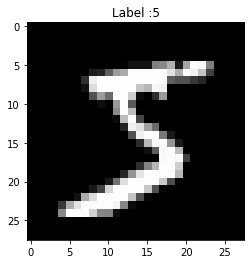

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28, 28)
plt.imshow(image, 'gray')
plt.title('Label :{}'.format(y_train[index]))
plt.show()

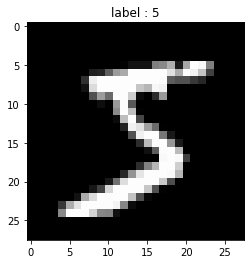

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [26]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # Convert to float type
image -= 105.35 # Intentionally try to create a negative decimal value
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # Check the value

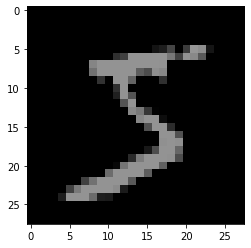

In [27]:
plt.imshow(image, 'gray', vmin = 0, vmax = 255)

In [28]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(48000, 784)
(12000, 784)


## Mini-Batch Processing

In [30]:
class GetMiniBatch:
    """
Iterator to get a mini-batch
    Parameters
    ----------
    X : The following forms of ndarray, shape (n_samples, n_features)
      Training data
    y : The following form of ndarray, shape (n_samples, 1)
      Correct answer value
    batch_size : int
      Batch size
    seed : int
      NumPy random number seed
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [31]:
n_features = 784
n_nodes1 = 400
n_output = 10
sigma = 0.01 # Standard deviation of Gaussian distribution
W1 = sigma * np.random.randn(n_features, n_nodes1)
# W1: (784, 400)
n_nodes2 = 200
n_nodes3 = 10
W2 = sigma * np.random.randn(n_nodes1, n_nodes2)
b1 = sigma * np.random.randn(n_nodes1)
b2 = sigma * np.random.randn(n_nodes2)
W3 = sigma * np.random.randn(n_nodes2, n_output)
b3 = sigma * np.random.randn(n_nodes3)
print("W1-->", W1.shape)
print("W2-->", W2.shape)
print("b1-->", b1.shape)
print("b2-->", b2.shape)
print("W3-->", W3.shape)
print("b3-->", b3.shape)

W1--> (784, 400)
W2--> (400, 200)
b1--> (400,)
b2--> (200,)
W3--> (200, 10)
b3--> (10,)


In [33]:
class ScratchSimpleNeuralNetrowkClassifier():

    def __init__(self, verbose = False):
        self.verbose = verbose
        self.batch_size = 20
        self.n_features = 784
        self.n_nodes1 = 400
        self.n_nodes2 = 200
        self.n_output = 10
        self.sigma = 0.02
        self.lr = 0.01
        self.epoch = 10

        
    def fit(self, X, y, X_val=None, y_val=None):
      self.loss_train = []
      self.loss_test = []
      self.W1 = self.sigma * np.random.randn(self.n_features, self.n_nodes1)
      self.W2 = self.sigma * np.random.randn(self.n_nodes1, self.n_nodes2)
      self.W3 = self.sigma * np.random.randn(self.n_nodes2, self.n_output)
      self.B1 = self.sigma * np.random.randn(1, self.n_nodes1)
      self.B2 = self.sigma * np.random.randn(1, self.n_nodes2)
      self.B3 = self.sigma * np.random.randn(1, self.n_output)

      for _ in range(self.epoch):
        get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size)
        for mini_X_train, mini_y_train in get_mini_batch:
          self.forward(mini_X_train)
          self.backward(mini_X_train, mini_y_train)
        self.forward(X)
        self.loss_train.append(self.cross_entropy_error(y, self.Z3))
        if X_val is not None:
          self.forward(X_val)  
          self.loss_test.append(self.cross_entropy_error(y_val, self.Z3))

      if self.verbose:
        print(self.loss_train)    

    def forward(self, X):
      self.A1 = X @ self.W1 + self.B1
      self.Z1 = self.tanh_function(self.A1)    
      self.A2 = self.Z1 @ self.W2 + self.B2
      self.Z2 = self.tanh_function(self.A2)
      self.A3 = self.Z2 @ self.W3 + self.B3
      self.Z3 = self.softmax(self.A3)

    def backward(self, mini_X, mini_y):
      dA3 = self.Z3 - mini_y
      dB3 = np.sum(dA3, axis=0)
      dW3 = self.Z2.T @ dA3
      dZ2 = dA3 @ self.W3.T
      dA2 = dZ2 * (1-self.tanh_function(self.A2)**2)
      dB2 = np.sum(dA2, axis=0)
      dW2 = self.Z1.T @ dA2
      dZ1 = dA2 @ self.W2.T
      dA1 = dZ1 * (1-self.tanh_function(self.A1)**2)
      dB1 = np.sum(dA1, axis=0)
      dW1 = mini_X.T @ dA1
      self.W3 -= self.lr *dW3
      self.B3 -= self.lr *dB3
      self.W2 -= self.lr *dW2
      self.B2 -= self.lr *dB2
      self.W1 -= self.lr *dW1
      self.B1 -= self.lr *dB1

    def sigmoid_function(self, A):
      return 1/(1+np.exp(-A))

    def tanh_function(self, A):
      return np.tanh(A)

    def softmax(self, A):
      return np.exp(A) / np.sum(np.exp(A), axis=1).reshape(-1, 1)

    def cross_entropy_error(self, y, Z):
      L = -np.sum(y*np.log(Z))/len(y)
      return L

    def predict(self, X):
      self.forward(X)
      return np.argmax(self.Z3, axis=1)      

## Problem 6 Learning and Estimation

In [34]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown = 'ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_val[:, np.newaxis])

In [37]:
NN = ScratchSimpleNeuralNetrowkClassifier()
NN.fit(X_train, y_train_one_hot, X_val, y_test_one_hot)
pred_train = NN.predict(X_train)
pred_test = NN.predict(X_val)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, pred_train)

0.9955208333333333

In [39]:
accuracy_score(y_val, pred_test)

0.9745833333333334

# Problem 7 - Plotting Learning Curve

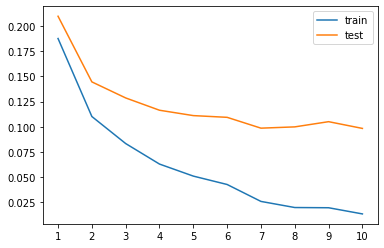

In [45]:
plt.plot(list(range(1, NN.epoch+1)), NN.loss_train, label='train')
plt.plot(list(range(1, NN.epoch+1)), NN.loss_test, label='test')
plt.legend()
plt.xticks(list(range(1, NN.epoch+1)));

# Problem 8 - Confirmation of Misclassification
### Being able to see what the misclassified images look like

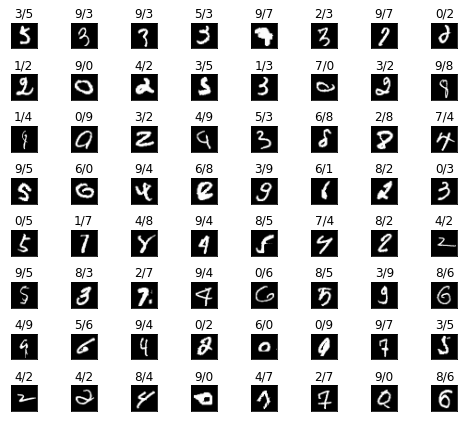

In [49]:
y_pred = pred_test
num = 64
true_false = y_pred==y_val
false_list = np.where(true_false==False)[0].astype(np.int)
if false_list.shape[0] < num:
  num = false_list.shape[0]
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(left=0, right=0.8, top=0.8, hspace=1, wspace=0.5)
for i in range(num):
  ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
  ax.set_title("{}/{}".format(y_pred[false_list[i]], y_val[false_list[i]]))
  ax.imshow(X_val.reshape(-1, 28, 28)[false_list[i]], cmap='gray')  